# IMDB - Binary Classification
> ## NLP(Natural Language Processing)
## Import TensorFlow

In [5]:
import warnings
warnings.filterwarnings('ignore')

* TensorFlow  Version 확인

In [6]:
import tensorflow as tf

tf.__version__

'2.10.0'

* GPU 설정 확인

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

* GPU 정보 확인

In [ ]:
!nvidia-smi 

Mon Mar 28 08:24:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    57W / 149W |    145MiB / 11441MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# I. IMDB Data_Set Load & Review

> ## 1) Load IMDB Data_Set

* Word to Vector
* 전체 데이터 내에서 단어의 사용빈도에 따라 인덱스화
* 정수 인덱스 '11'은 11번째로 자주 사용된 단어를 나타냄
* num_words = 10000 : 인덱스 값 10000 이하의 단어만 추출
* 단어 인덱스 값이 10000을 넘지 않는 단어만 분석에 사용

In [7]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [8]:
max(max(W) for W in train_data)

9999

> ## 2) Visualization & Frequency(Optional)

* x - Histogram(리뷰 길이)

리뷰 최대 길이 : 2494
리뷰 평균 길이 : 238.71364


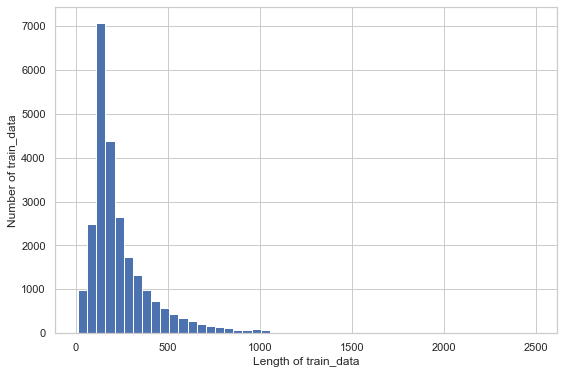

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

print('리뷰 최대 길이 :', max(len(L) for L in train_data))
print('리뷰 평균 길이 :', sum(map(len, train_data))/len(train_data))

plt.figure(figsize = (9, 6))
plt.hist([len(L) for L in train_data], bins = 50)
plt.xlabel('Length of train_data')
plt.ylabel('Number of train_data')
plt.show()

* y - Frequency(0:부정, 1:긍정)

In [11]:
import numpy as np

unique_elements, counts_elements = np.unique(train_labels, return_counts = True)

print('Label 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

Label 빈도수:
[[    0     1]
 [12500 12500]]


> ## 3) Data Structure Review(Optional)

In [12]:
# 전체 train_data 개수
print(len(train_data))

# 첫번째 train_data 정보
print(len(train_data[0]))
print(train_data[0][0:10])
print(train_data[0].count(4))
print(train_labels[0])

25000
218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
15
1


> ## 4) Vector to Word(Optional)

* get_word_index( ) : 단어와 인덱스를 매핑한 사전
* 0, 1, 2 : '패딩', '문장 시작', '어휘 사전에 없음'

In [ ]:
word_index = imdb.get_word_index()

print(word_index)

* 인덱스와 단어 위치 변경

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

print(reverse_word_index)

* 0번 영화 리뷰 디코딩(1:긍정)

In [15]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)
print(train_labels[0])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

* 1번 영화리뷰 디코딩(0:부정)

In [16]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

print(decoded_review)
print(train_labels[1])

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
0


# II. Tensor Transformation

> ## 1) X_train & X_test : (25000, 10000)

* vectorize_sequence( ) 정의
* 크기는 10000이고 모든 원소가 0인 행렬 생성
 * np.zeros(len(sequences), dimension))
* 값이 존재하는 인덱스의 위치를 1로 지정
 * enumerate( )
 * results[i, sequence] = 1.0

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

* enumerate( ) - Example

In [18]:
r = np.zeros((5, 10))
v = [1, 3, 5, 7, 9]

for i, v in enumerate(v):
    r[i, v] = 1.0

print(r)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


* vectorize_sequence( ) 적용

In [19]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

X_train.shape, X_test.shape

((25000, 10000), (25000, 10000))

* Transformation Check

In [20]:
print(X_train[0][:21])
print(X_train[0][9979:])

print(X_test[0][:21])
print(X_test[0][9979:])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


> ## 2) y_train & y_test

In [21]:
y_train = np.asarray(train_labels).astype(float)
y_test = np.asarray(test_labels).astype(float)

print(y_train[:21])
print(y_test[:21])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


> ## 3) Train vs. Validation Split

In [22]:
X_valid = X_train[:10000]
partial_X_train = X_train[10000:]

y_valid = y_train[:10000]
partial_y_train = y_train[10000:]

partial_X_train.shape, partial_y_train.shape, X_valid.shape, y_valid.shape

((15000, 10000), (15000,), (10000, 10000), (10000,))

# III. IMDB Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

imdb = models.Sequential()
imdb.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
imdb.add(layers.Dense(16, activation = 'relu'))
imdb.add(layers.Dense(1, activation = 'sigmoid'))

* 모델 구조 확인

In [24]:
imdb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [25]:
imdb.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

> ## 3) Model Fit

* 약 1분

In [26]:
%%time

Hist_imdb = imdb.fit(partial_X_train, partial_y_train,
                     epochs = 50,
                     batch_size = 512,
                     validation_data = (X_valid, y_valid))

Epoch 1/50
30/30 [==============================] - 4s 76ms/step - loss: 0.5162 - accuracy: 0.7896 - val_loss: 0.3841 - val_accuracy: 0.8701
Epoch 2/50
30/30 [==============================] - 1s 33ms/step - loss: 0.3051 - accuracy: 0.9026 - val_loss: 0.3063 - val_accuracy: 0.8870
Epoch 3/50
30/30 [==============================] - 1s 35ms/step - loss: 0.2238 - accuracy: 0.9282 - val_loss: 0.2893 - val_accuracy: 0.8842
Epoch 4/50
30/30 [==============================] - 1s 41ms/step - loss: 0.1781 - accuracy: 0.9419 - val_loss: 0.3326 - val_accuracy: 0.8634
Epoch 5/50
30/30 [==============================] - 1s 37ms/step - loss: 0.1453 - accuracy: 0.9550 - val_loss: 0.2837 - val_accuracy: 0.8870
Epoch 6/50
30/30 [==============================] - 1s 40ms/step - loss: 0.1214 - accuracy: 0.9624 - val_loss: 0.2957 - val_accuracy: 0.8877
Epoch 7/50
30/30 [==============================] - 1s 33ms/step - loss: 0.0994 - accuracy: 0.9704 - val_loss: 0.3072 - val_accuracy: 0.8837
Epoch 8/50
30

> ## 4) 학습 결과 시각화

* Loss Visualization

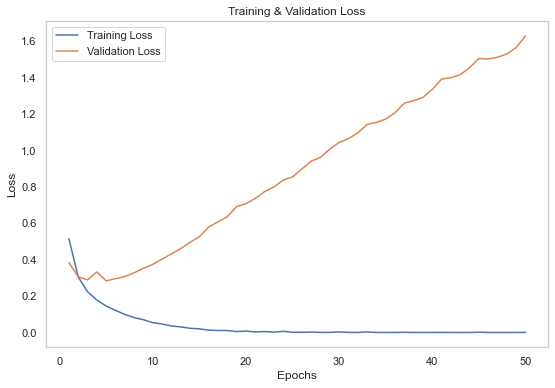

In [27]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_imdb.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_imdb.history['loss'])
plt.plot(epochs, Hist_imdb.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

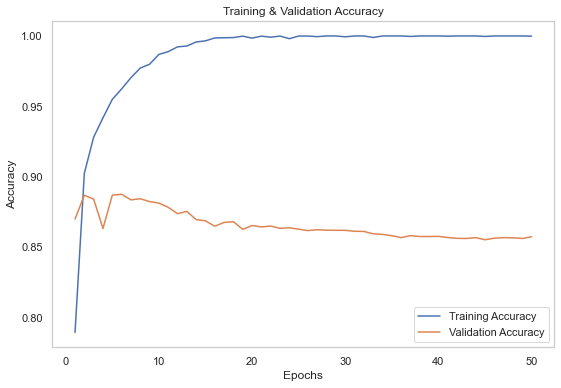

In [28]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_imdb.history['accuracy']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_imdb.history['accuracy'])
plt.plot(epochs, Hist_imdb.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [29]:
loss, accuracy = imdb.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

782/782 [==============================] - 4s 4ms/step - loss: 1.7731 - accuracy: 0.8409
Loss = 1.77310
Accuracy = 0.84088


> ## 6) Model Predict

In [30]:
np.round(imdb.predict(X_test))

# 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
# np.round(imdb.predict(X_test[[0]]))

782/782 [==============================] - 3s 3ms/step


array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

# 
# 
# 
# The End
# 
# 
# 